In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split


/var/folders/rk/dysxg_n95dj298tmpfpz545r0000gn/T/ipykernel_68296/1724717772.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='phase', y=band, data=data, palette="Set2")
/var/folders/rk/dysxg_n95dj298tmpfpz545r0000gn/T/ipykernel_68296/1724717772.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='phase', y=band, data=data, palette="Set2")
/var/folders/rk/dysxg_n95dj298tmpfpz545r0000gn/T/ipykernel_68296/1724717772.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='phase', y=band, data=data, palette="Set2")
/var/folders/rk/dysxg_

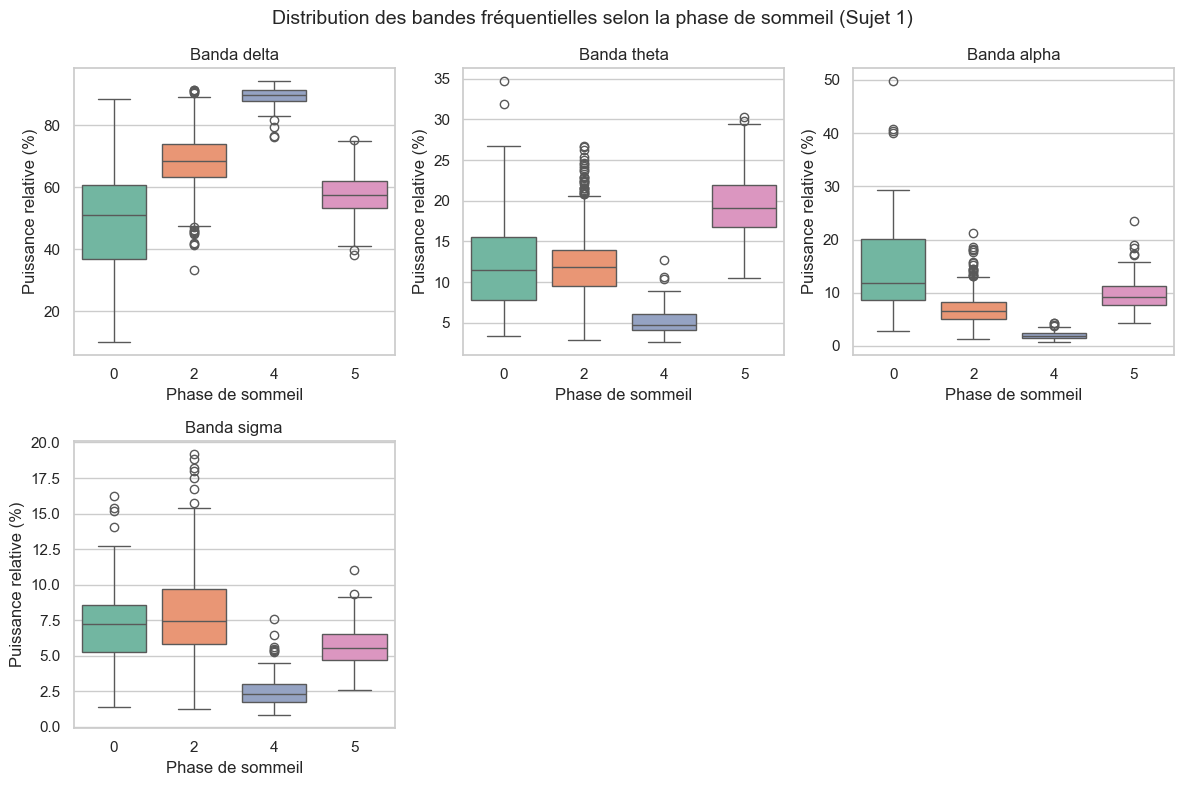

In [22]:

#%% Get dataset
data = pd.read_excel("Sujet1.xlsx",sheet_name=0,header=0,index_col=0)
#%%
#%% Criação dos boxplots
bands = ['delta', 'theta', 'alpha', 'sigma']

plt.figure(figsize=(12, 8))

# IA
for i, band in enumerate(bands, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='phase', y=band, data=data, palette="Set2")
    plt.title(f'Banda {band}')
    plt.xlabel('Phase de sommeil')
    plt.ylabel('Puissance relative (%)')

plt.suptitle("Distribution des bandes fréquentielles selon la phase de sommeil (Sujet 1)", fontsize=14)
plt.tight_layout()
plt.show()


/var/folders/rk/dysxg_n95dj298tmpfpz545r0000gn/T/ipykernel_68296/120195002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='phase', data=data, palette='pastel')


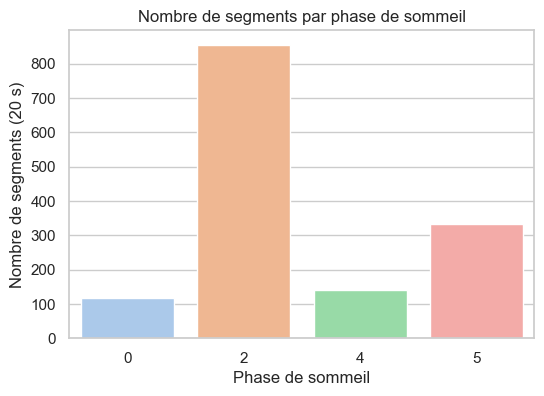

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x='phase', data=data, palette='pastel')
plt.title('Nombre de segments par phase de sommeil')
plt.xlabel('Phase de sommeil')
plt.ylabel('Nombre de segments (20 s)')
plt.show()

In [ ]:
print("Répartition des phases de sommeil – Sujet 1:")
y = data['phase']
print(y.value_counts().sort_index())

data2 = pd.read_excel("Sujet2.xlsx",sheet_name=0,header=0,index_col=0)
print("Répartition des phases de sommeil – Sujet 2:")
y = data2['phase']
print(y.value_counts().sort_index())


data3= pd.read_excel("Sujet3.xlsx",sheet_name=0,header=0,index_col=0)
print("Répartition des phases de sommeil – Sujet 3:")
y = data3['phase']
print(y.value_counts().sort_index())


Répartition des phases de sommeil – Sujet 1:
phase
0    117
2    855
4    140
5    333
Name: count, dtype: int64
Répartition des phases de sommeil – Sujet 2:
phase
0    195
2    611
4    268
5    365
Name: count, dtype: int64
Répartition des phases de sommeil – Sujet 3:
phase
0    144
2    770
4    270
5    255
Name: count, dtype: int64


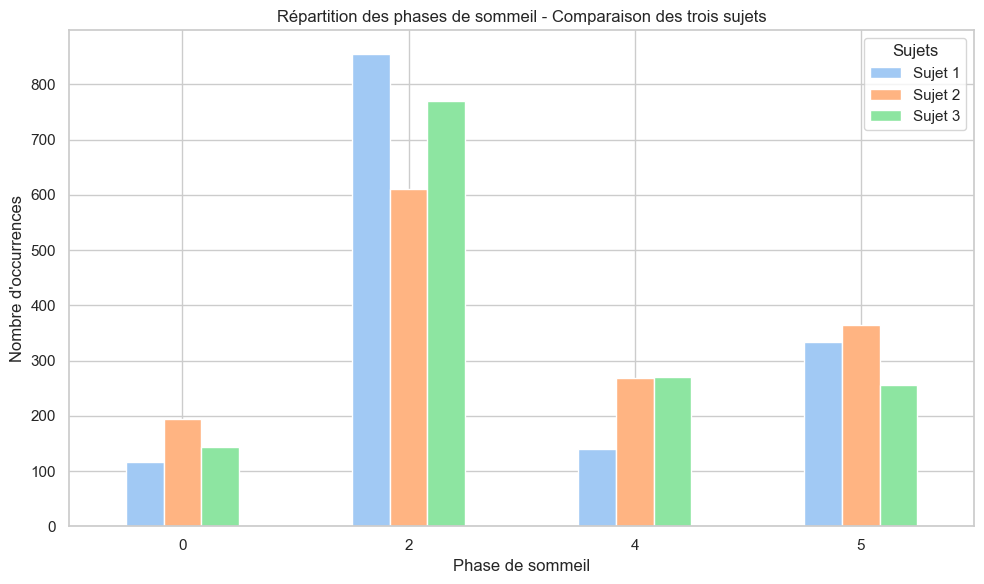

In [ ]:
# Isso aqui foi IA

# Leitura dos dados
data1 = pd.read_excel("Sujet1.xlsx", sheet_name=0, header=0, index_col=0)
data2 = pd.read_excel("Sujet2.xlsx", sheet_name=0, header=0, index_col=0)
data3 = pd.read_excel("Sujet3.xlsx", sheet_name=0, header=0, index_col=0)

# Contagem das fases
counts1 = data1['phase'].value_counts().sort_index()
counts2 = data2['phase'].value_counts().sort_index()
counts3 = data3['phase'].value_counts().sort_index()

# Criação do DataFrame para comparação
df_counts = pd.DataFrame({
    'Sujet 1': counts1,
    'Sujet 2': counts2,
    'Sujet 3': counts3
}).fillna(0)  # preencher com 0 caso alguma fase não exista em algum sujeito

# Plotagem do histograma
df_counts.plot(kind='bar', figsize=(10,6))
plt.title("Répartition des phases de sommeil - Comparaison des trois sujets")
plt.xlabel("Phase de sommeil")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=0)
plt.legend(title="Sujets")
plt.tight_layout()
plt.show()


In [38]:
def calculate_class_weights(y):
    # Conta o número de amostras por classe
    counts = y.value_counts()
    total = len(y)
    # Peso = total / (n_classes * count da classe)
    weights = {cls: total/(len(counts)*count) for cls, count in counts.items()}
    return weights

# Pesos de cada dataset
weights1 = calculate_class_weights(data1['phase'])
weights2 = calculate_class_weights(data2['phase'])
weights3 = calculate_class_weights(data3['phase'])

print("Pesos – Sujet 1:", weights1)
print("Pesos – Sujet 2:", weights2)
print("Pesos – Sujet 3:", weights3)

Pesos – Sujet 1: {2: 0.42251461988304095, 5: 1.084834834834835, 4: 2.580357142857143, 0: 3.0876068376068377}
Pesos – Sujet 2: {2: 0.5887888707037643, 5: 0.9856164383561644, 4: 1.3423507462686568, 0: 1.844871794871795}
Pesos – Sujet 3: {2: 0.4672077922077922, 4: 1.3324074074074075, 5: 1.4107843137254903, 0: 2.498263888888889}


<class 'pandas.core.frame.DataFrame'>
Index: 1445 entries, 0 to 1444
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   delta      1445 non-null   float64
 1   theta      1445 non-null   float64
 2   alpha      1445 non-null   float64
 3   sigma      1445 non-null   float64
 4   beta       1445 non-null   float64
 5   puissance  1445 non-null   float64
 6   phase      1445 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 90.3 KB


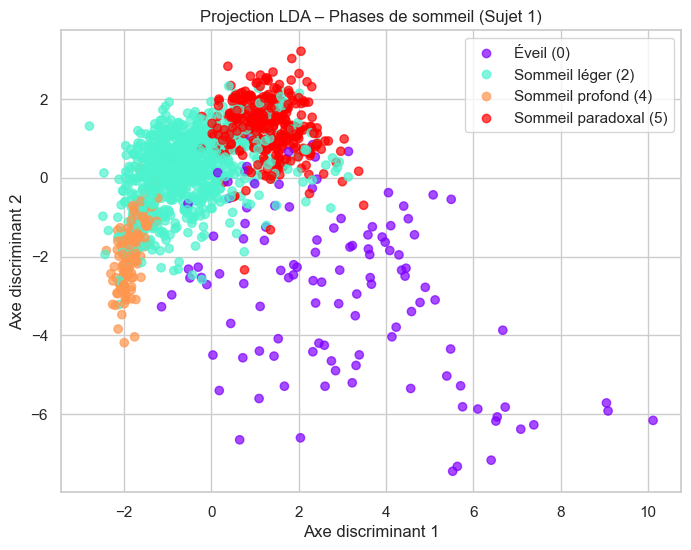

In [30]:
X=data.dropna() #si j'ai de valeurs manquant je le suprimme
X.info()
#%% 
# Analyse discriminante
n,p=X.shape
# Removendo colunas que não queremos analisar
# Alvo -> classe = phase 

y = data['phase']
X = data[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX =X.drop(columns=['beta']) # no enunciado esta indicado
XX.describe()

lda = LinearDiscriminantAnalysis() # On veut projeter sur 2 axes pour visualiser
X_lda = lda.fit_transform(XX, y)



#%% Visualisation
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap='rainbow', alpha=0.7)
plt.xlabel('Axe discriminant 1')
plt.ylabel('Axe discriminant 2')
plt.title('Projection LDA – Phases de sommeil (Sujet 1)')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Éveil (0)', 'Sommeil léger (2)', 'Sommeil profond (4)', 'Sommeil paradoxal (5)'],
           loc='best')
plt.show()

lda_df = pd.DataFrame(lda.coef_, columns=['delta', 'theta', 'alpha', 'sigma','puissance'],
                      index=['Éveil (0)', 'Sommeil léger (2)', 'Sommeil profond (4)', 'Sommeil paradoxal (5)'])


Comentarios sobre o BoxPlot: 
- Banda Delta: Podemos classificar 0/5 e 2 e 4 ;
- Banda Theta: Podemos classificar o 5 ?
- Banda alpha: 

Comentarios Sobre a lda:


In [ ]:
# utilise les 420 primeiros, utilizar a funcao de reparricao para evr se temos o memso nuemro de classes nessa amostra

/var/folders/rk/dysxg_n95dj298tmpfpz545r0000gn/T/ipykernel_68296/2820643712.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='phase', y=band, data=data, palette="Set2")
/var/folders/rk/dysxg_n95dj298tmpfpz545r0000gn/T/ipykernel_68296/2820643712.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='phase', y=band, data=data, palette="Set2")
/var/folders/rk/dysxg_n95dj298tmpfpz545r0000gn/T/ipykernel_68296/2820643712.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='phase', y=band, data=data, palette="Set2")
/var/folders/rk/dysxg_

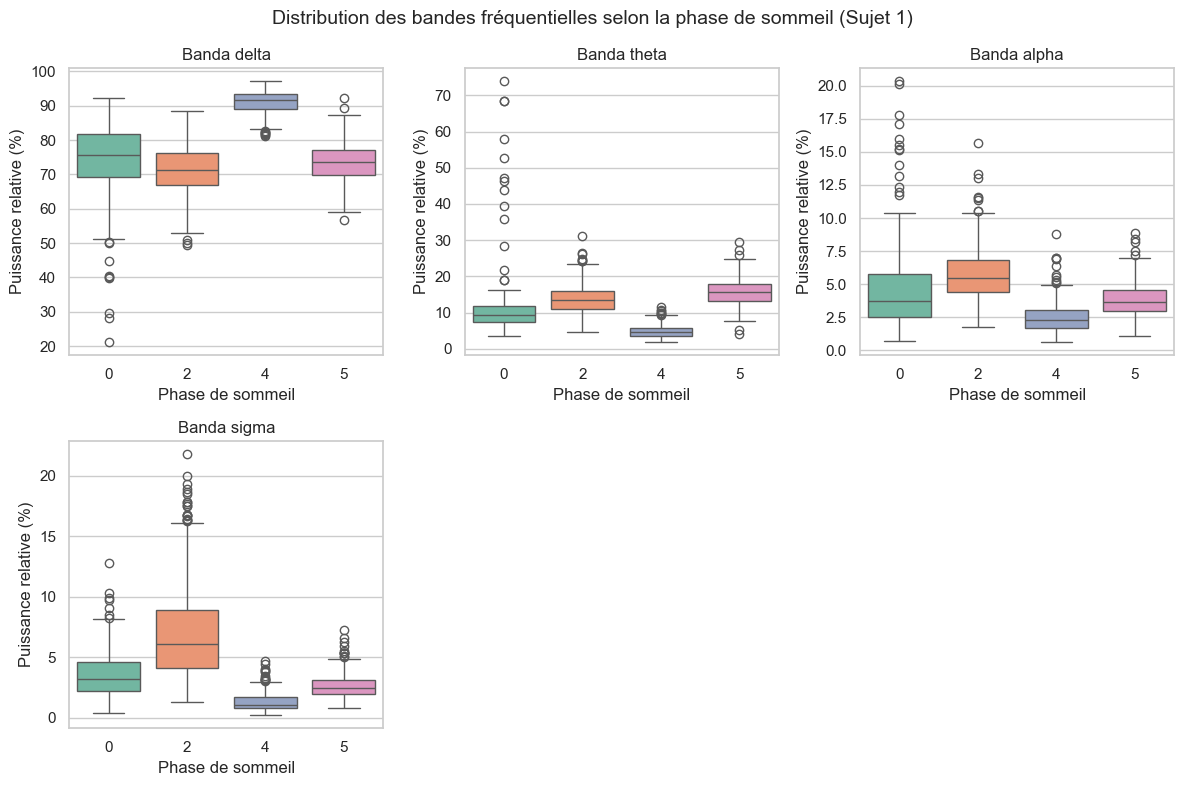

<class 'pandas.core.frame.DataFrame'>
Index: 1439 entries, 0 to 1438
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   delta      1439 non-null   float64
 1   theta      1439 non-null   float64
 2   alpha      1439 non-null   float64
 3   sigma      1439 non-null   float64
 4   beta       1439 non-null   float64
 5   puissance  1439 non-null   float64
 6   phase      1439 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 89.9 KB


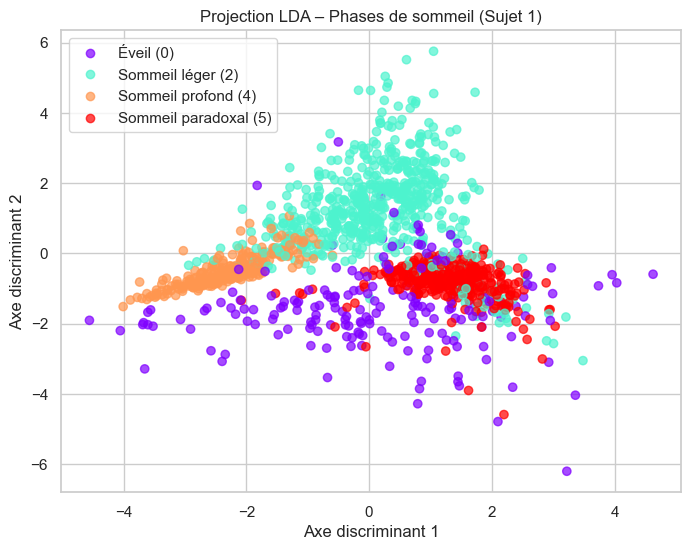

Coefficients discriminants de la LDA :
                          delta     theta     alpha     sigma      beta
Éveil (0)             -1.188477 -1.141087 -1.032034 -1.309242  0.194504
Sommeil léger (2)      0.328550  0.355074  0.517392  0.707082 -0.020236
Sommeil profond (4)    0.489036  0.253472  0.431344  0.220856  0.121997
Sommeil paradoxal (5) -0.274118 -0.170874 -0.631452 -0.646340 -0.159614


In [20]:
#%% Get dataset
data = pd.read_excel("Sujet2.xlsx",sheet_name=0,header=0,index_col=0)
#%%
#%% Criação dos boxplots
bands = ['delta', 'theta', 'alpha', 'sigma']

plt.figure(figsize=(12, 8))

# IA
for i, band in enumerate(bands, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='phase', y=band, data=data, palette="Set2")
    plt.title(f'Banda {band}')
    plt.xlabel('Phase de sommeil')
    plt.ylabel('Puissance relative (%)')

plt.suptitle("Distribution des bandes fréquentielles selon la phase de sommeil (Sujet 1)", fontsize=14)
plt.tight_layout()
plt.show()

X=data.dropna() #si j'ai de valeurs manquant je le suprimme
X.info()
#%% 
# Analyse discriminante
n,p=X.shape
# Removendo colunas que não queremos analisar
# Alvo -> classe = phase 

y = data['phase']
X = data[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX =X.drop(columns=['beta']) # no enunciado esta indicado
XX.describe()

lda = LinearDiscriminantAnalysis() # On veut projeter sur 2 axes pour visualiser
X_lda = lda.fit_transform(XX, y)

#%% Visualisation
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap='rainbow', alpha=0.7)
plt.xlabel('Axe discriminant 1')
plt.ylabel('Axe discriminant 2')
plt.title('Projection LDA – Phases de sommeil (Sujet 1)')
plt.legend(handles=scatter.legend_elements()[0],
           labels=['Éveil (0)', 'Sommeil léger (2)', 'Sommeil profond (4)', 'Sommeil paradoxal (5)'],
           loc='best')
plt.show()

lda_df = pd.DataFrame(lda.coef_, columns=['delta', 'theta', 'alpha', 'sigma', 'beta'],
                      index=['Éveil (0)', 'Sommeil léger (2)', 'Sommeil profond (4)', 'Sommeil paradoxal (5)'])
print("Coefficients discriminants de la LDA :")
print(lda_df)
